In [1]:
! pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.3 MB 10.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.3 MB 9.9 MB/s eta 0:00:01
   ----------------------------- ---------- 6.8/9.3 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  9.2/9.3 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 9.8 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
   --------- ------------------------------ 3.7/14.9 MB 16.7 MB/s eta 0:00:01
   ----------------------- ---------------- 8.7/14.9 MB 20.6 MB/s eta 0:00:01
   -------------------------------- ------- 12.1/14.9 MB 19.3 MB/s eta 0:00:01
   -------------------------------------- - 14.4/14.9 MB 17.1 MB/s eta 0:00:01
   ---------------------------------------- 14.9/

In [3]:
! pip install pandas

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ------------- -------------------------- 3.7/10.8 MB 19.8 MB/s eta 0:00:01
   -------------------------------- ------- 8.7/10.8 MB 21.5 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 21.0 MB/s eta 0:00:00
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


MedInc: 지역의 중간 소득(Median Income)
HouseAge: 주택 건축 후 연수
AveRooms: 평균 방 갯수
AveBedrms: 평균 침실 갯수
Population: 지역 인구 수
AveOccup: 가구당 평균 거주 인원
Latitude: 위도
Longitude: 경도
PRICE(MedHouseVal): 지역 주택 중간 가격(단위: 10만 달러)

In [14]:
#(1) 필요한 모듈 임포트

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
#(2) 데이터셋 분할
# 종속 변수와 독립 변수를 분리
Y = california_df['PRICE']
X = california_df.drop(['PRICE'], axis=1, inplace=False)

# 훈련용 데이터(70%)와 테스트용 데이터(30%)로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=156)

print("학습 데이터 크기:", X_train.shape, Y_train.shape)
print("테스트 데이터 크기:", X_test.shape, Y_test.shape)


학습 데이터 크기: (14448, 8) (14448,)
테스트 데이터 크기: (6192, 8) (6192,)


In [16]:
#(3)모델 생성 및 학습
# 선형 회귀 모델 객체 생성
lr = LinearRegression()

# 모델 학습
lr.fit(X_train, Y_train)

# 테스트 데이터 예측
Y_predict = lr.predict(X_test)


In [17]:
#(4) 모델 평가 및 회귀계수 확인
# MSE, RMSE, R2(결정 계수) 평가 지표 계산
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_predict)

print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))
print("R^2 : {:.3f}".format(r2))

# 절편(intercept)과 회귀계수(coefficient) 확인
print("\nY 절편값:", lr.intercept_)

# 회귀계수를 컬럼명과 함께 Series로 묶어서 보기
coeff = pd.Series(lr.coef_, index=X.columns)
coeff = coeff.round(3).sort_values(ascending=False)
print("\n회귀계수값:")
print(coeff)


MSE : 0.543
RMSE : 0.737
R^2 : 0.595

Y 절편값: -37.23905305294162

회귀계수값:
AveBedrms     0.598
MedInc        0.432
HouseAge      0.010
Population   -0.000
AveOccup     -0.007
AveRooms     -0.099
Latitude     -0.425
Longitude    -0.438
dtype: float64


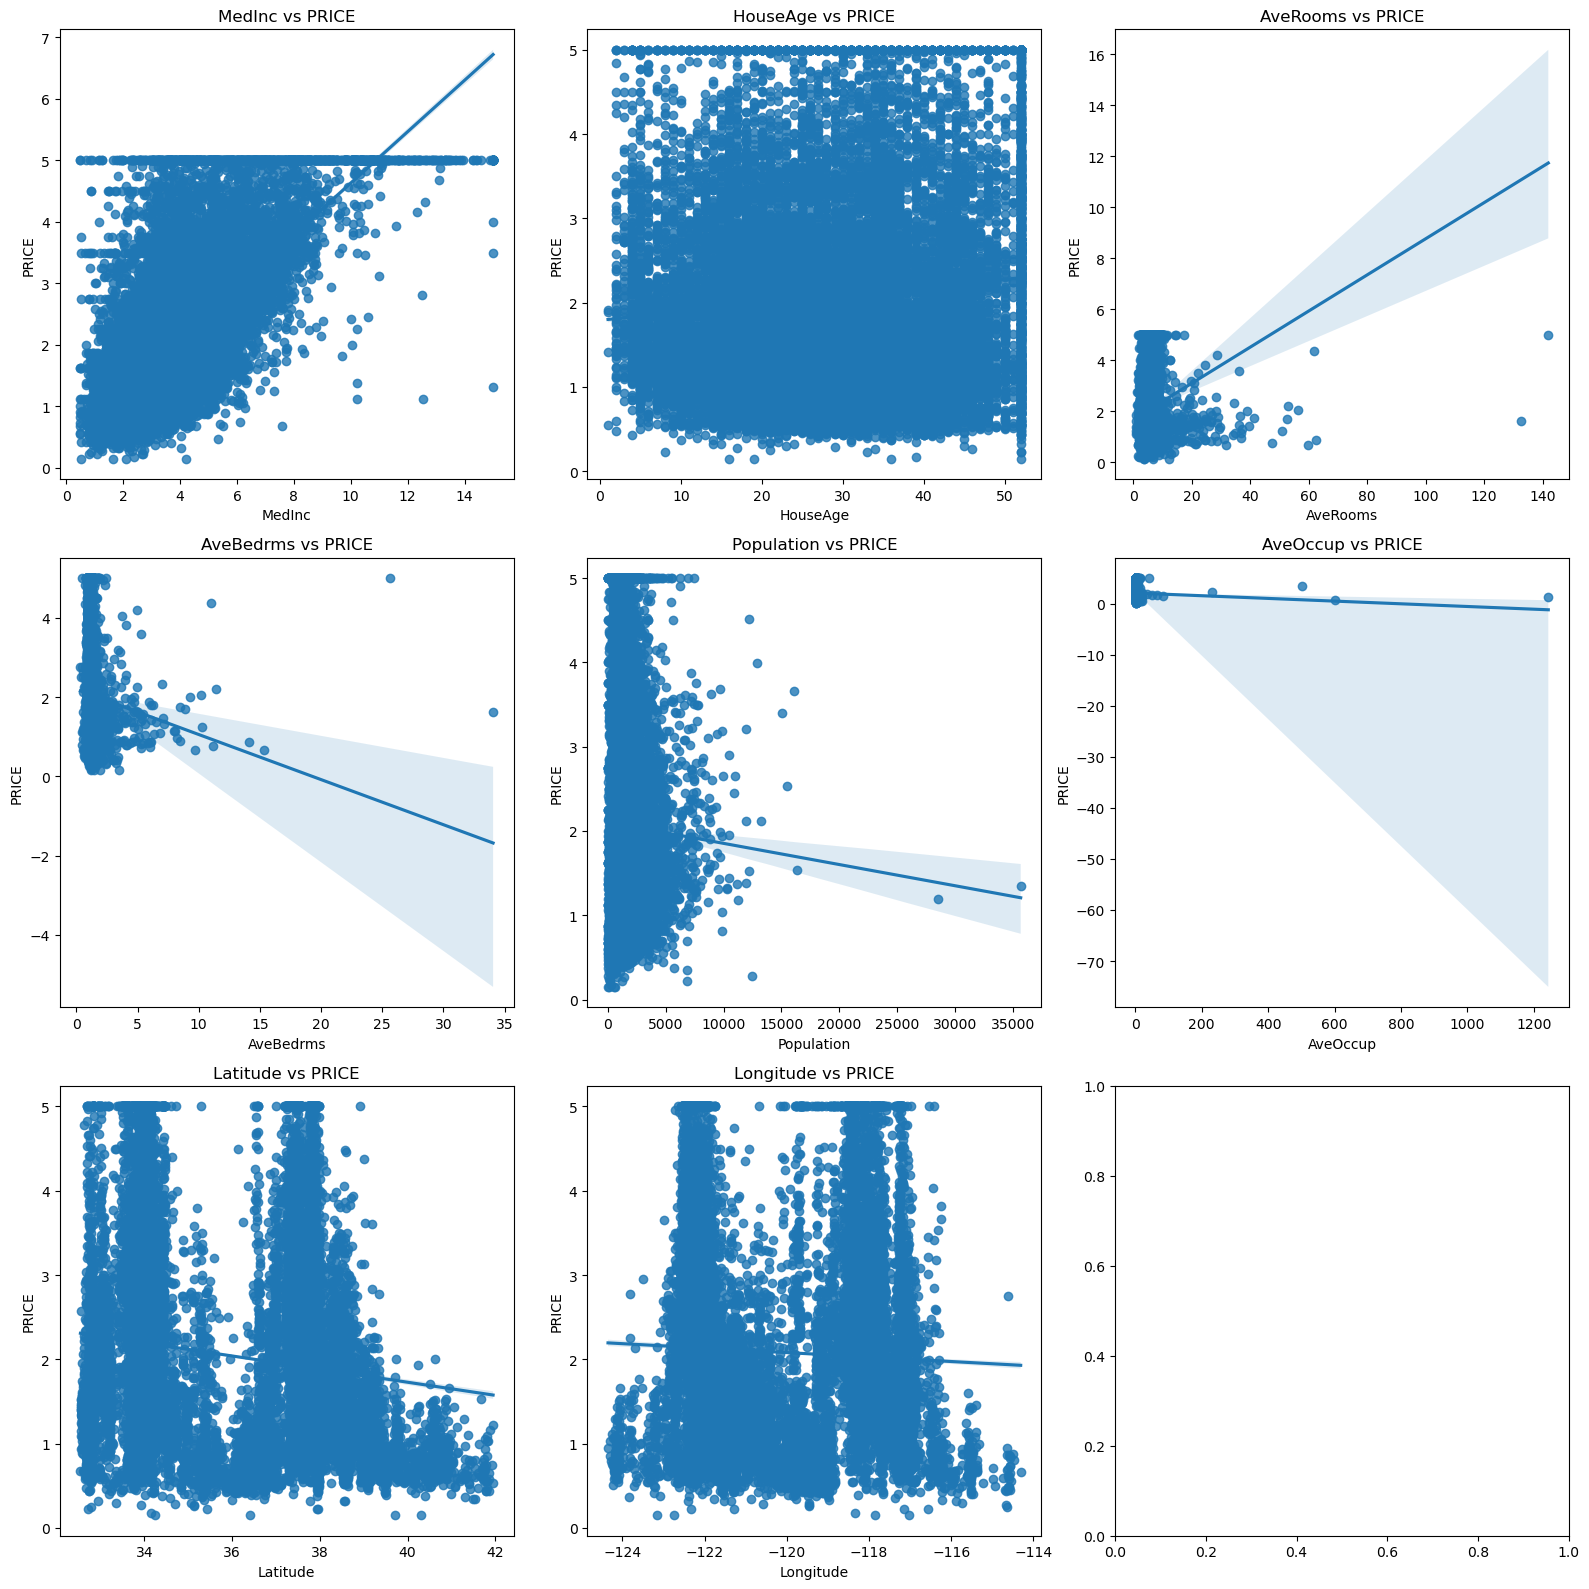

In [18]:
#3. 산점도 + 선형회귀 그래프 시각화
# 캘리포니아 데이터셋의 feature 명
x_features = california.feature_names  # ['MedInc', 'HouseAge', 'AveRooms', ...]

# subplots을 이용해 nrows x ncols 개의 그래프 생성
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=3)
axs = axs.flatten()  # 2차원 배열 -> 1차원 리스트로

for i, feature in enumerate(x_features):
    # 예외적으로 8개(Latitude, Longitude)가 있어 총 8개 특성
    if i < 9:
        sns.regplot(x=feature, 
                    y='PRICE', 
                    data=california_df, 
                    ax=axs[i])
        axs[i].set_title(f"{feature} vs PRICE")

plt.tight_layout()
plt.show()
